In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Corner features

Một corner feature trong ảnh được định nghĩa tại vị trí pixel đó với cửa số ảnh nhìn là $W$, nếu $W$ dịch đi theo một vector $\overrightarrow{\Delta}$ độ dài rất nhỏ thì có thể ước lượng được $\overrightarrow{\Delta}$ dựa trên corner. 

Dựa trên định nghĩa đó thì một corner feature trong ảnh sẽ có đặc điểm là vector đạo hàm theo hướng tại điểm đó đều có độ dài rất lớn. Nghĩa là hàm $$E(u,v) = \sum_{x,y}{\underbrace{w(x,y)}_{\text{hàm cửa sổ $W$}} \left[ I(x+u,y+v) - I(x,y) \right]^2}$$ có độ lớn cao với mọi hướng $(u,v)$.

Thực hiện xấp xỉ hàm $E(u,v)$ thành một hàm bậc hai, khi đó $E(u,v) \approx \begin{bmatrix} u & v \end{bmatrix} M \begin{bmatrix} u \\ v \end{bmatrix}$, với $M$ là ma trận $2 \times 2$. Để $E(u,v)$ có độ lớn với mọi hướng $(u,v)$ thì giá trị riêng của ma trận $M$ đều rất lớn. Dùng hàm $R$ để đánh giá độ lớn của giá trị riêng trong ma trận $M$: $$R = \mathrm{det}(M) - k\left( \mathrm{trace}(M) \right)^2$$
* $|R| \approx 0$ - các giá trị trong cửa sổ $W$ khá gần nhau (cả hai giá trị riêng xấp xỉ 0)
* $R < 0$ - cửa số $W$ chứa cạnh của ảnh (một trong hai giá trị riêng xấp xỉ 0, còn lại là rất lớn)
* $R \gg 0$ - cửa số $W$ có chứa corner feature (cả hai giá trị riêng đều rất lớn)

Cách đánh giá trị riêng trên được gọi là Harris. Ngoài ra, có một cách đánh giá khác $R=\min(\lambda_1, \lambda_2)$ được gọi là Shi-Tomasi.



#### Harris corner detector

Sử dụng hàm `cornerHarris`, với tham số truyền
* `src` - ảnh gray scale
* `blockSize` - kích thước cửa sổ $W$
* `ksize` - kích thước cửa sổ sobel cho việc tính đạo hàm 
* `k` - tham số trong hàm đánh giá $R$ của thuật toán Harris

Hàm trả về ma trận vói các giá trị $R$ tính được từ thuật toán Harris có kích thước bằng với ảnh truyền vào.

8594962.0


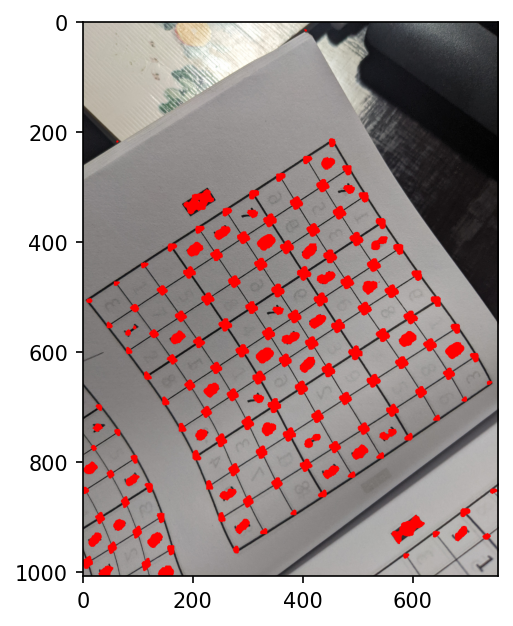

In [5]:
img = cv.imread("../images/sudoku.jpg") # đọc ảnh bảng sudoku

H,W = img.shape[:2]
img = cv.resize(img, (W//4, H//4))

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY).astype(np.float32) # chuyển ảnh BGR sang gray scale
dst = cv.cornerHarris(img_gray, 17, 3, 0.04) # chạy thuật toán Harris
# dst = cv.dilate(dst,None)

print(dst.max())

img_corners = img.copy()
img_corners[dst > 0.07 * dst.max()] = [0, 0, 255]

plt.rcParams['figure.dpi']=150
plt.imshow(cv.cvtColor(img_corners, cv.COLOR_BGR2RGB))

#### Shi-Tomasi cornder detector

Sử dụng hàm `goodFeaturesToTrack` để xác định các corner feature bằng Shi-Tomasi, với tham số truyền:
* `src` - ảnh grayscale
* `maxCorners` - số lượng góc tối đa muốn xác định, truyền vào `-1` nếu không giới hạn số lượng
* `qualityLevel` - tỉ lệ giá trị $R$ của các corner feature với $R_{max}$ (với các pixel có tỉ lệ $R$ với $R_{max}$ nhỏ hơn tham số truyền vào thì không coi đó là corner).
* `minDistance` - khoảng cách tối thiểu giữa các corner.

Trả về ma trận, trong đó mỗi hàng chứa một vector  chỉ tọa độ của corner trong ảnh.

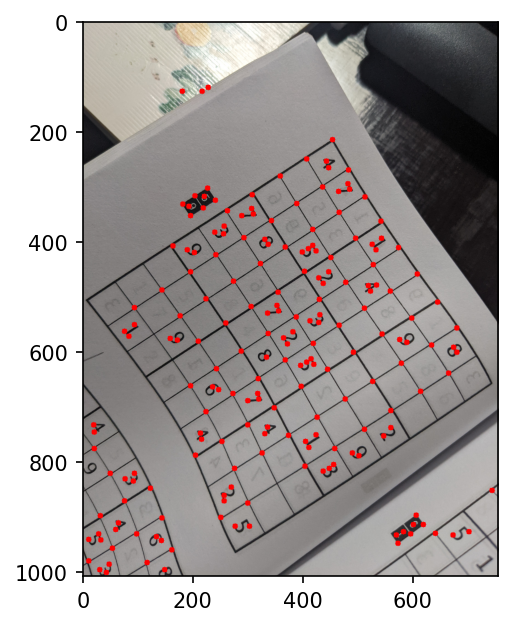

In [6]:
img = cv.imread("../images/sudoku.jpg") # đọc ảnh bảng sudoku

H,W = img.shape[:2]
img = cv.resize(img, (W//4, H//4))

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY).astype(np.float32) # chuyển ảnh BGR sang gray scale

corners = cv.goodFeaturesToTrack(img_gray,200,0.01,10)
img_corners = img.copy()

for row in corners:
    # duyện mọi hàng trong ma trận corners
    x, y = np.int32(row.ravel())
    cv.circle(img_corners, (x, y), 5, (0,0,255), -1) # vẽ hình tròn tại điểm corner bằng màu đỏ


plt.rcParams['figure.dpi']=150
plt.imshow(cv.cvtColor(img_corners, cv.COLOR_BGR2RGB))